<a href="https://colab.research.google.com/github/doyeon520/NLP/blob/main/word2vec_%ED%95%9C%EA%B5%AD%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 3.6MB 45.5MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f510466ccf8>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
len(train_data)

200000

In [ ]:
train_data.isnull().values.sum()

8

In [ ]:
train_data=train_data.dropna(how='any')


In [ ]:
train_data.isnull().values.sum()

0

In [ ]:
len(train_data)

199992

In [ ]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)
    print('불용어=>',temp_X)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
불용어=> ['영화', '에서', '한국', '을', '바라보다', '관점', '마음', '안듬']
불용어=> ['프랑스', '내', '수용', '영화', '프랑스', '특유', '정서', '적', '지저분하다', '자다', '나타나다', '이야기', '않다', '변죽', '만', '울리다', '다가', '시', '덥다', '감상', '끝나다']
불용어=> ['ㄱㅈㄴ', 'ㅍㄷㅇㅇ']
불용어=> ['안중근', '의사', '님', '생애', '창작', '쓸다', '것', '같다', '실존', '인물', '생애', '아니다']
불용어=> ['포스터', '영화', '중요하다', '내용', '다', '보여주다', '뻔하다', '스토리', '이건', '쫌', '아니다']
불용어=> ['별로', '이다', '정말', '지루하다']
불용어=> ['요즘', '일본', '영상', '물', '분위기', '꽤', '익숙해지다', '생각', '이건', '진짜', '아니다', 'ㅡㅡ']
불용어=> ['주인공', '멍청하다', '범인', '무적', '이다', '괜히', '가슴', '졸', '이며', '보다']
불용어=> ['편', '보고', '보다', '적인걸', '멀다', '아니다', '여주', '이쁘다', '빼다', '실망하다']
불용어=> ['왜', '점', '없다', '왜', '마이너스', '점', '없다']
불용어=> ['괜히', '보다', '수준', '이하', '지루', '페이크', '형식', '블레어', '위치', '비교', '한참', '한참', '밑']
불용어=> ['성웅', '이순신', '을', '코믹', '만들다', '년', '지난', '지금', '보다', 'ㅂㄷㅂㄷ', '거', '린다']
불용어=> ['황비홍', '보다', '다음', '적인걸', '보다', '진짜', '못', '보다', '옛날', '영화', '보다', '못', '액션', '을', '허다', '접', '애', '맡다', '그렇다', '별

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


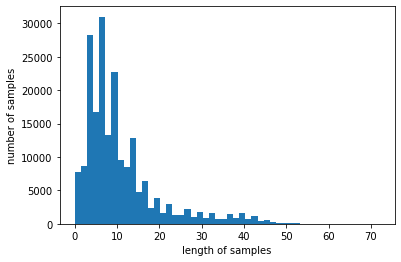

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('송강호', 0.8645820617675781), ('안성기', 0.8591576218605042), ('한석규', 0.8585395812988281), ('박중훈', 0.8491944074630737), ('설경구', 0.8364863991737366), ('임원희', 0.833240270614624), ('최민수', 0.8318964242935181), ('김창완', 0.8266796469688416), ('김명민', 0.8263683319091797), ('워싱턴', 0.8242405652999878)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-07-13 02:47:07--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.37.134
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.37.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  95.1MB/s    in 16s     

2020-07-13 02:47:24 (95.8 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
###사전 훈련된 구글의 W2V
import gensim
model=gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
model.vectors.shape

(3000000, 300)

In [ ]:
model.similarity('dog','cat')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.76094574

In [ ]:
model.similarity('dog','hat')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.19933015

In [ ]:
model['book'] #단어 book의 벡터 출력

array([ 0.11279297, -0.02612305, -0.04492188,  0.06982422,  0.140625  ,
        0.03039551, -0.04370117,  0.24511719,  0.08740234, -0.05053711,
        0.23144531, -0.07470703,  0.21875   ,  0.03466797, -0.14550781,
        0.05761719,  0.00671387, -0.00701904,  0.13183594, -0.25390625,
        0.14355469, -0.140625  , -0.03564453, -0.21289062, -0.24804688,
        0.04980469, -0.09082031,  0.14453125,  0.05712891, -0.10400391,
       -0.19628906, -0.20507812, -0.27539062,  0.03063965,  0.20117188,
        0.17382812,  0.09130859, -0.10107422,  0.22851562, -0.04077148,
        0.02709961, -0.00106049,  0.02709961,  0.34179688, -0.13183594,
       -0.078125  ,  0.02197266, -0.18847656, -0.17480469, -0.05566406,
       -0.20898438,  0.04858398, -0.07617188, -0.15625   , -0.05419922,
        0.01672363, -0.02722168, -0.11132812, -0.03588867, -0.18359375,
        0.28710938,  0.01757812,  0.02185059, -0.05664062, -0.01251221,
        0.01708984, -0.21777344, -0.06787109,  0.04711914, -0.00

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/My Drive/cslee/ko.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
###사전 훈련된 구글의 W2V
import gensim
model=gensim.models.Word2Vec.load('ko.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
result=model.wv.most_similar('강아지')
result

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('고양이', 0.7290452718734741),
 ('거위', 0.7185635566711426),
 ('토끼', 0.7056223154067993),
 ('멧돼지', 0.6950401067733765),
 ('엄마', 0.6934334635734558),
 ('난쟁이', 0.6806551218032837),
 ('한마리', 0.6770296096801758),
 ('아가씨', 0.6750352382659912),
 ('아빠', 0.6729634404182434),
 ('목걸이', 0.6512460708618164)]